## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.


*Atenção - Utilizar a base de dados em anexo que é a mesma base que utilizamos na atividade anterior! A base Boston, assim como para a primeira atividade foi descontinuada e não deve ser utilizada*

In [15]:
import pandas as pd

import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [3]:
df = pd.read_csv('housing.csv')
df = pd.get_dummies(df, columns=['ocean_proximity'])
y = df['median_house_value']
X = df.drop(columns=['median_house_value'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
tree_depth_5 = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_depth_5.fit(X_train, y_train)
tree_depth_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_depth_2.fit(X_train, y_train)
y_pred_8 = tree_depth_5.predict(X_test)
y_pred_2 = tree_depth_2.predict(X_test)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [4]:
path = tree_depth_5.cost_complexity_pruning_path(X_train, y_train)

# Extrair os valores de alpha e as complexidades correspondentes
ccp_alphas = path.ccp_alphas
impurities = path.impurities

In [5]:
print("CCP Alphas:")
print(ccp_alphas)
print("Impurities:")
print(impurities)

CCP Alphas:
[0.00000000e+00 4.33371578e+06 5.89900980e+06 6.62017075e+06
 8.35381838e+06 8.71815613e+06 1.11314719e+07 1.42725245e+07
 1.52583287e+07 1.59629368e+07 1.68004131e+07 1.81509016e+07
 2.01990297e+07 2.46074252e+07 2.78686616e+07 3.46609866e+07
 3.78556473e+07 3.83189734e+07 4.37929785e+07 5.15584824e+07
 5.16568642e+07 6.45811689e+07 8.51595550e+07 9.47960225e+07
 1.26893733e+08 1.33324692e+08 1.98504954e+08 2.07449926e+08
 6.04797091e+08 6.08311415e+08 1.76498484e+09 4.17243813e+09]
Impurities:
[4.79299830e+09 4.79733202e+09 4.80323103e+09 4.80985120e+09
 4.81820501e+09 4.82692317e+09 4.83805464e+09 4.85232717e+09
 4.86758550e+09 4.88354843e+09 4.90034885e+09 4.91849975e+09
 4.93869878e+09 4.96330620e+09 4.99117486e+09 5.02583585e+09
 5.06369150e+09 5.10201047e+09 5.14580345e+09 5.19736193e+09
 5.24901880e+09 5.31359997e+09 5.39875952e+09 5.49355554e+09
 5.62044928e+09 5.75377397e+09 5.95227892e+09 6.15972885e+09
 6.76452594e+09 7.37283735e+09 9.13782220e+09 1.33102603e+10

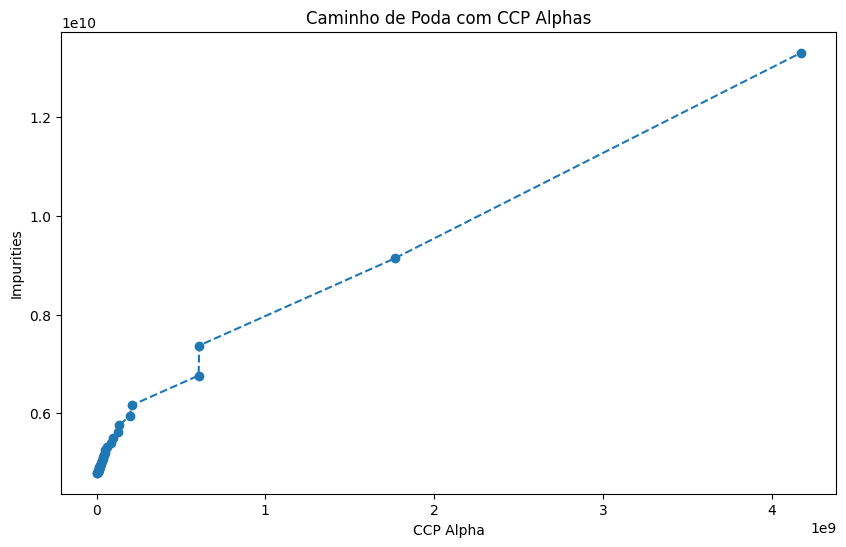

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities, marker='o', linestyle='--')
plt.xlabel('CCP Alpha')
plt.ylabel('Impurities')
plt.title('Caminho de Poda com CCP Alphas')
plt.show()

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

CCP:
Alpha: 0.0, Árvore: DecisionTreeRegressor(random_state=42)
Alpha: 4333715.775406212, Árvore: DecisionTreeRegressor(ccp_alpha=4333715.775406212, random_state=42)
Alpha: 5899009.802215993, Árvore: DecisionTreeRegressor(ccp_alpha=5899009.802215993, random_state=42)
Alpha: 6620170.747859061, Árvore: DecisionTreeRegressor(ccp_alpha=6620170.747859061, random_state=42)
Alpha: 8353818.375177324, Árvore: DecisionTreeRegressor(ccp_alpha=8353818.375177324, random_state=42)
Alpha: 8718156.125383448, Árvore: DecisionTreeRegressor(ccp_alpha=8718156.125383448, random_state=42)
Alpha: 11131471.881954059, Árvore: DecisionTreeRegressor(ccp_alpha=11131471.881954059, random_state=42)
Alpha: 14272524.479101766, Árvore: DecisionTreeRegressor(ccp_alpha=14272524.479101766, random_state=42)
Alpha: 15258328.694387674, Árvore: DecisionTreeRegressor(ccp_alpha=15258328.694387674, random_state=42)
Alpha: 15962936.799491018, Árvore: DecisionTreeRegressor(ccp_alpha=15962936.799491018, random_state=42)
Alpha: 168

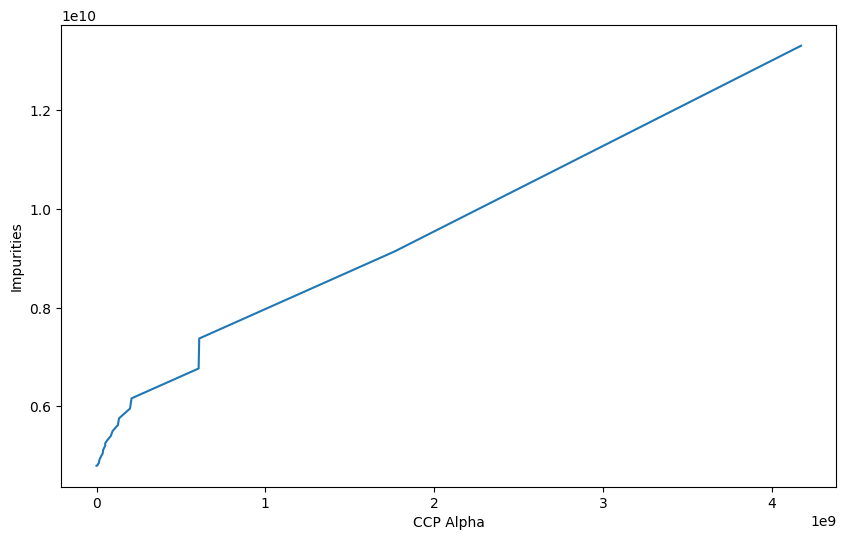

In [7]:
trees = []

for alpha in ccp_alphas:
    tree = DecisionTreeRegressor(ccp_alpha=alpha, random_state=42)
    tree.fit(X_train, y_train)
    trees.append(tree)

print("CCP:")
for i, alpha in enumerate(ccp_alphas):
    print(f"Alpha: {alpha}, Árvore: {trees[i]}")

# Visualizar o caminho de poda
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel('CCP Alpha')
plt.ylabel('Impurities')
plt.show()

### 4. Para cada árvore na lista, calcule o MSE da árvore.

Alpha: 0.0000, MSE: 4764424709.8187
Alpha: 4333715.7754, MSE: 3707602476.5710
Alpha: 5899009.8022, MSE: 3724089252.9598
Alpha: 6620170.7479, MSE: 3797933561.4231
Alpha: 8353818.3752, MSE: 3807527504.0619
Alpha: 8718156.1254, MSE: 3812673603.1226
Alpha: 11131471.8820, MSE: 3869360678.7139
Alpha: 14272524.4791, MSE: 3995101294.3724
Alpha: 15258328.6944, MSE: 4019242708.8175
Alpha: 15962936.7995, MSE: 4054853263.9575
Alpha: 16800413.1206, MSE: 4039960909.8922
Alpha: 18150901.5944, MSE: 4123613831.0425
Alpha: 20199029.7220, MSE: 4211668727.3727
Alpha: 24607425.2466, MSE: 4263420450.8372
Alpha: 27868661.5669, MSE: 4463422844.5496
Alpha: 34660986.5872, MSE: 4717592321.3956
Alpha: 37855647.2796, MSE: 4758285960.0801
Alpha: 38318973.3552, MSE: 4758285960.0801
Alpha: 43792978.4631, MSE: 4992337615.9762
Alpha: 51558482.3526, MSE: 5020079909.8345
Alpha: 51656864.2086, MSE: 5102030273.8673
Alpha: 64581168.8822, MSE: 5242323110.4545
Alpha: 85159554.9703, MSE: 5339453510.3717
Alpha: 94796022.4506, M

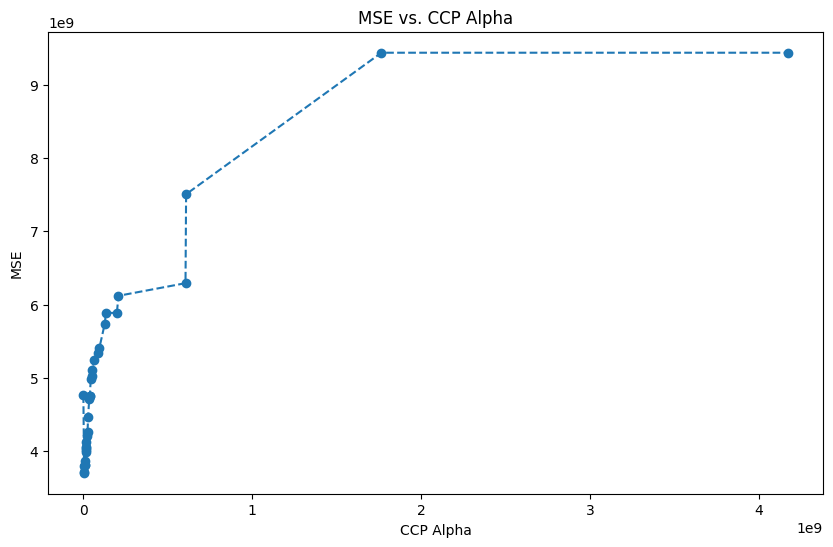

In [9]:
mse_list = []

for tree in trees:
    y_pred = tree.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_list.append(mse)

# Exibir os MSEs
for alpha, mse in zip(ccp_alphas, mse_list):
    print(f"Alpha: {alpha:.4f}, MSE: {mse:.4f}")

# Opcional: Visualizar o caminho de poda
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_list, marker='o', linestyle='--')
plt.xlabel('CCP Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. CCP Alpha')
plt.show()

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

Melhor valor de Alpha: 4333715.7754
MSE correspondente: 3707602476.5710


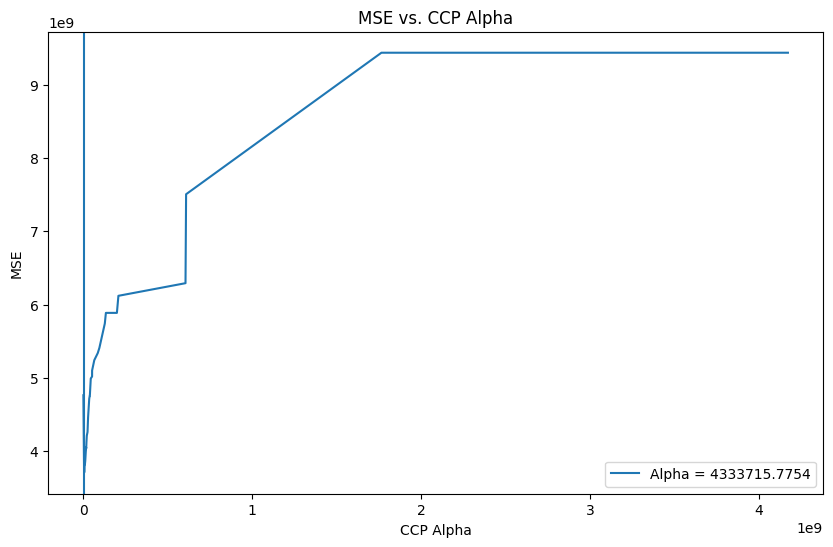

In [11]:
min_mse_idx = mse_list.index(min(mse_list))
best_alpha = ccp_alphas[min_mse_idx]
best_mse = mse_list[min_mse_idx]

print(f"Melhor valor de Alpha: {best_alpha:.4f}")
print(f"MSE correspondente: {best_mse:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_list)
plt.xlabel('CCP Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. CCP Alpha')
plt.axvline(x=best_alpha, label=f'Alpha = {best_alpha:.4f}')
plt.legend()
plt.show()

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

Melhor valor de Alpha: 4333715.7754
R-quadrado correspondente: 0.7218


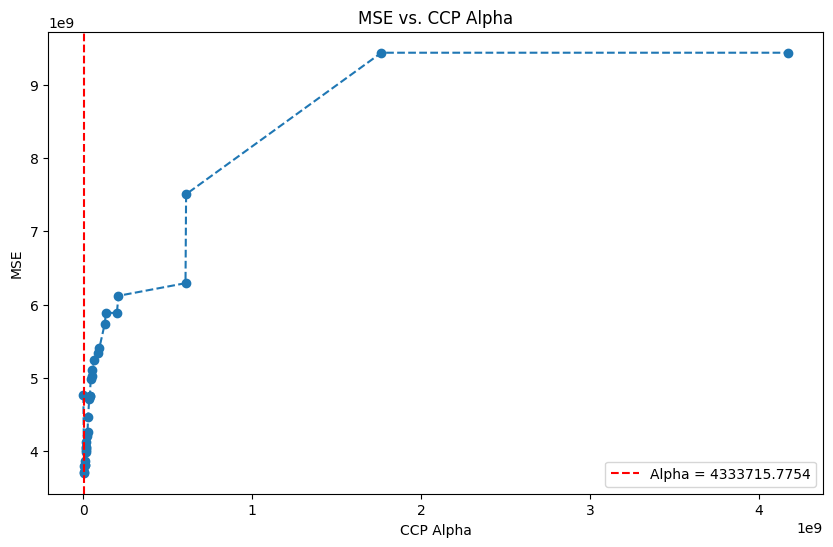

In [14]:
best_tree = trees[min_mse_idx]
y_pred_best_tree = best_tree.predict(X_test)
r2 = r2_score(y_test, y_pred_best_tree)

# Exibir o R-quadrado
print(f"Melhor valor de Alpha: {best_alpha:.4f}")
print(f"R-quadrado correspondente: {r2:.4f}")

# Plotar o MSE vs. CCP Alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_list, marker='o', linestyle='--')
plt.xlabel('CCP Alpha')
plt.ylabel('MSE')
plt.title('MSE vs. CCP Alpha')
plt.axvline(x=best_alpha, color='r', linestyle='--', label=f'Alpha = {best_alpha:.4f}')
plt.legend()
plt.show()

### 7. Visualize esta árvore.

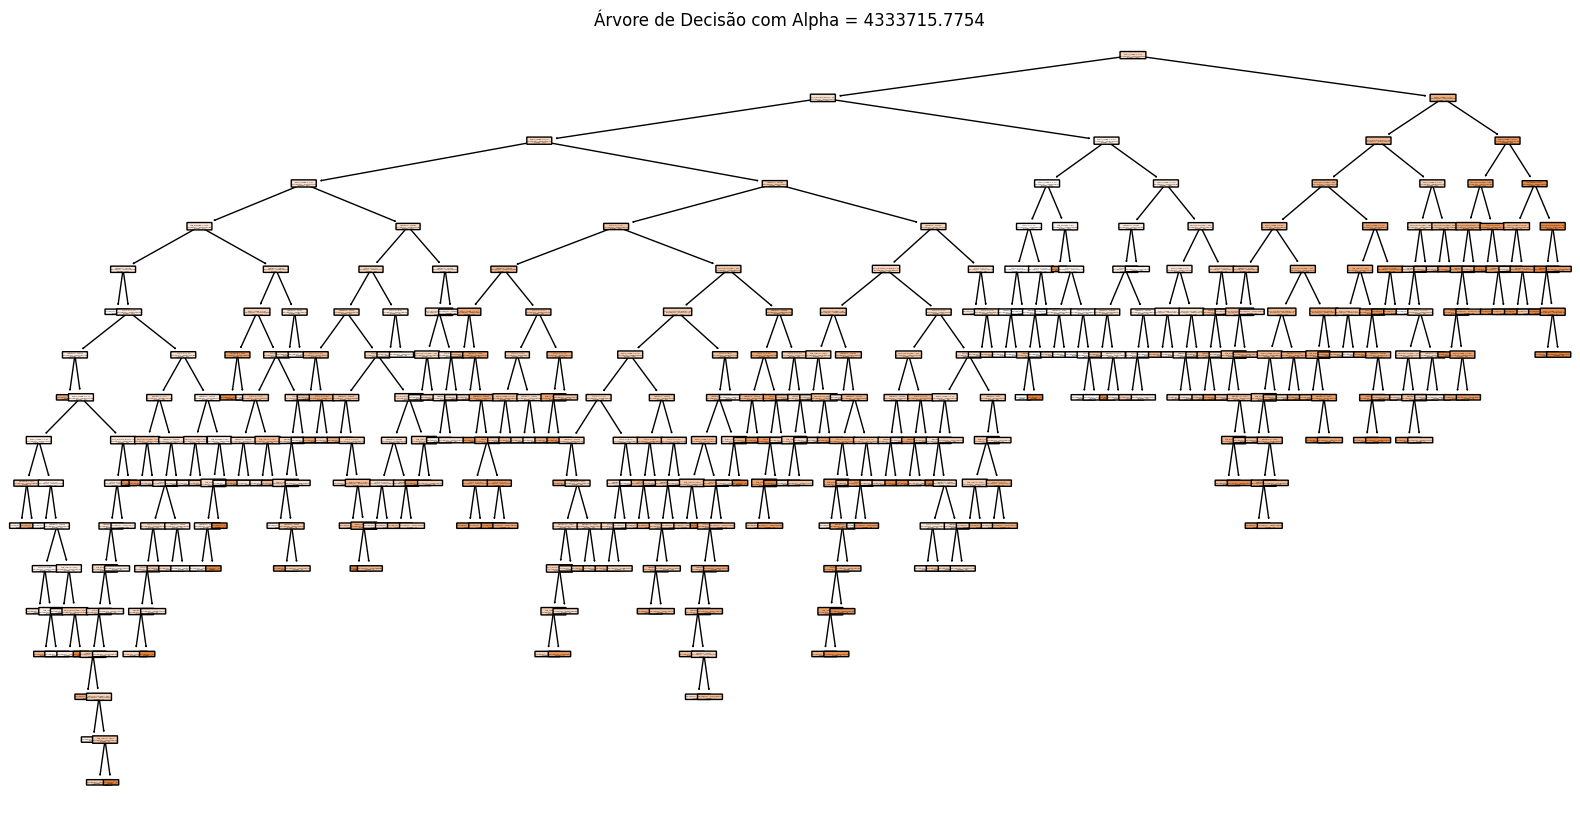

In [16]:
plt.figure(figsize=(20, 10)) 
plot_tree(best_tree, feature_names=X.columns, filled=True, rounded=True)
plt.title(f'Árvore de Decisão com Alpha = {best_alpha:.4f}')
plt.show()